In [1]:
# Imports
import torch
import numpy as np
import pandas as pd
from PIL import Image
import gymnasium as gym

from base_agent.dqn_agent import DQNAgent as BaseAgent
from per.dqn_agent import DQNAgent as PERAgent
from utils import make_epsilon_greedy_policy, plot_episode_stats

In [2]:
# Choose your environment
env = gym.make("MinAtar/Breakout-v1", render_mode="rgb_array")

# Print observation and action space infos
print(f"Training on {env.spec.id}")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}\n")

# Hyperparameters, Hint: Change as you see fit
LR = 0.0001
BATCH_SIZE = 256
REPLAY_BUFFER_SIZE = 100_000
UPDATE_FREQ = 100
EPS_START = 1
EPS_END = 0.01
SCHEDULE_DURATION = 150_00
NUM_EPISODES = 10_00

ALPHA = 0.5
BETA = 0.4
DISCOUNT_FACTOR = 0.99
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Training on MinAtar/Breakout-v1
Observation space: Box(False, True, (10, 10, 4), bool)
Action space: Discrete(3)



In [3]:
# Train DQN
agent = BaseAgent(
    env,
    gamma=DISCOUNT_FACTOR,
    lr=LR,
    batch_size=BATCH_SIZE,
    eps_start=EPS_START,
    eps_end=EPS_END,
    schedule_duration=SCHEDULE_DURATION,
    update_freq=UPDATE_FREQ,
    maxlen=REPLAY_BUFFER_SIZE,
    device=DEVICE
    # alpha=ALPHA,
    # beta=BETA,
)

base_agent_stats = agent.train(NUM_EPISODES)


Episode 100 of 1000  Time Step: 1038  Epsilon: 0.932
Episode 200 of 1000  Time Step: 2120  Epsilon: 0.860
Episode 300 of 1000  Time Step: 3302  Epsilon: 0.782
Episode 400 of 1000  Time Step: 4664  Epsilon: 0.692
Episode 500 of 1000  Time Step: 6234  Epsilon: 0.589
Episode 600 of 1000  Time Step: 7868  Epsilon: 0.481
Episode 700 of 1000  Time Step: 9810  Epsilon: 0.353
Episode 800 of 1000  Time Step: 12738  Epsilon: 0.159
Episode 900 of 1000  Time Step: 17316  Epsilon: 0.010
Episode 1000 of 1000  Time Step: 22780  Epsilon: 0.010


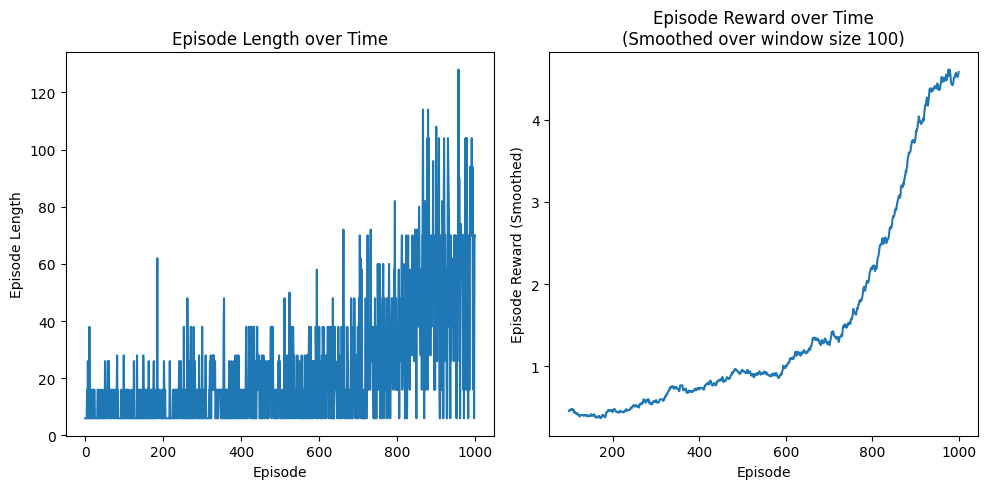

In [4]:
plot_episode_stats(base_agent_stats, smoothing_window=100)

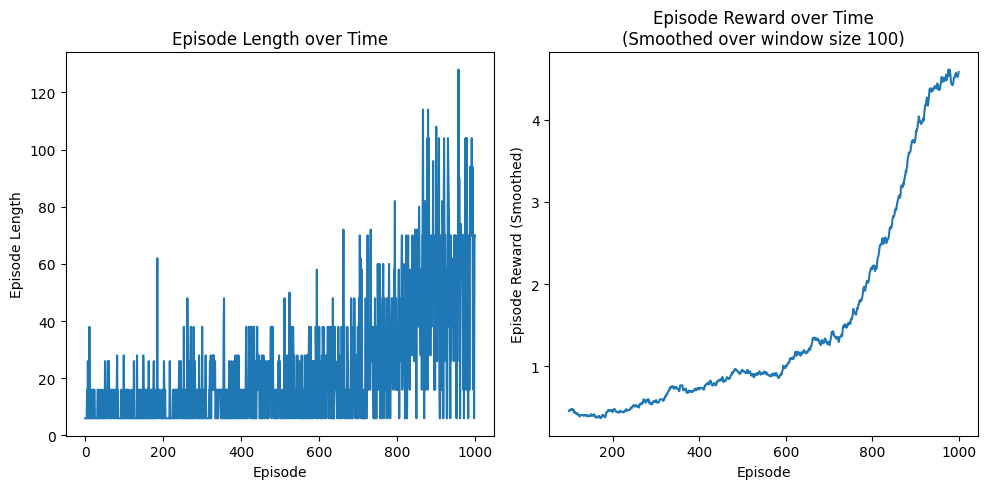

In [5]:
plot_episode_stats(base_agent_stats, smoothing_window=100)

In [6]:
df = pd.DataFrame({
    "episode": range(1, len(base_agent_stats.episode_lengths) + 1),
    "length": base_agent_stats.episode_lengths,
    "reward": base_agent_stats.episode_rewards
})

save_path = "results/breakout_base_stats.csv"

df.to_csv(save_path, index=False)

In [7]:
agent = PERAgent(
    env,
    gamma=DISCOUNT_FACTOR,
    lr=LR,
    batch_size=BATCH_SIZE,
    eps_start=EPS_START,
    eps_end=EPS_END,
    schedule_duration=SCHEDULE_DURATION,
    update_freq=UPDATE_FREQ,
    maxlen=REPLAY_BUFFER_SIZE,
    device=DEVICE,
    alpha=ALPHA,
    beta=BETA,
)

per_agent_stats = agent.train(NUM_EPISODES)

df = pd.DataFrame({
    "episode": range(1, len(base_agent_stats.episode_lengths) + 1),
    "length": base_agent_stats.episode_lengths,
    "reward": base_agent_stats.episode_rewards
})

save_path = "results/breakout_per_stats.csv"

df.to_csv(save_path, index=False)

/home/ghandill/rl_lab/rl-project-per/per/dqn_agent.py:183: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(obs),
/home/ghandill/rl_lab/rl-project-per/per/dqn_agent.py:184: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(action),


Episode 100 of 1000  Time Step: 698  Epsilon: 0.954
Episode 200 of 1000  Time Step: 1652  Epsilon: 0.891
Episode 300 of 1000  Time Step: 2740  Epsilon: 0.819
Episode 400 of 1000  Time Step: 4104  Epsilon: 0.729
Episode 500 of 1000  Time Step: 5814  Epsilon: 0.616
Episode 600 of 1000  Time Step: 7702  Epsilon: 0.492
Episode 700 of 1000  Time Step: 9880  Epsilon: 0.348
Episode 800 of 1000  Time Step: 12726  Epsilon: 0.160
Episode 900 of 1000  Time Step: 16276  Epsilon: 0.010


KeyboardInterrupt: 

In [ ]:
plot_episode_stats(per_agent_stats, smoothing_window=100)

In [ ]:
df = pd.DataFrame({
    "episode": range(1, len(base_agent_stats.episode_lengths) + 1),
    "length": base_agent_stats.episode_lengths,
    "reward": base_agent_stats.episode_rewards
})

save_path = "results/breakout_per_stats.csv"

df.to_csv(save_path, index=False)

In [5]:
# df = pd.DataFrame({
#     "episode": range(1, len(stats.episode_lengths) + 1),
#     "length": stats.episode_lengths,
#     "reward": stats.episode_rewards
# })

# save_path = "results/asterix_per_stats.csv"

# df.to_csv(save_path, index=False)

In [6]:
# from IPython.display import Image as IImage

# def save_rgb_animation(rgb_arrays, filename, duration=50):
#     """Save an animated GIF from a list of RGB arrays."""
#     # Create a list to hold each frame
#     frames = []

#     # Convert RGB arrays to PIL Image objects
#     for rgb_array in rgb_arrays:
#         rgb_array = (rgb_array*255).astype(np.uint8)
#         rgb_array = rgb_array.repeat(48, axis=0).repeat(48, axis=1)
#         img = Image.fromarray(rgb_array)
#         frames.append(img)

#     # Save the frames as an animated GIF
#     frames[0].save(filename, save_all=True, append_images=frames[1:], duration=duration, loop=0)

# def rendered_rollout(policy, env, max_steps=1_000):
#     """Rollout for one episode while saving all rendered images."""
#     obs, _ = env.reset()
#     imgs = [env.render()]

#     for _ in range(max_steps):
#         action = policy(torch.as_tensor(obs, dtype=torch.float32).unsqueeze(0))
#         obs, _, terminated, truncated, _ = env.step(action)
#         imgs.append(env.render())
        
#         if terminated or truncated:
#             break

#     return imgs

# policy = make_epsilon_greedy_policy(agent.q, num_actions=env.action_space.n)
# imgs = rendered_rollout(policy, env)
# save_rgb_animation(imgs, "trained.gif")
# IImage(filename="trained.gif")

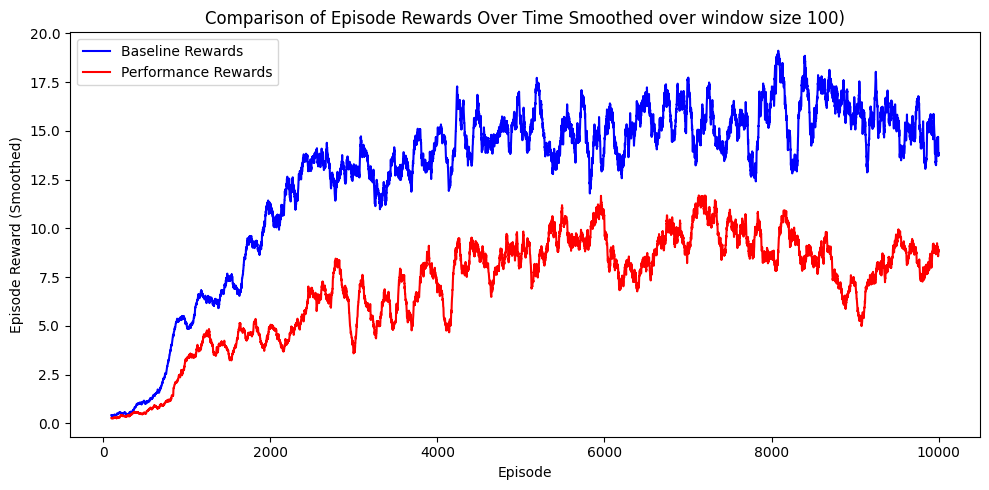

In [1]:
# Comparison plots 
import pandas as pd

from utils import plot_comparison_stats

base_stats = pd.read_csv("results/breakout_base.csv")
per_stats = pd.read_csv("results/breakout_per.csv")

plot_comparison_stats(base_stats, per_stats)

In [4]:
base_stats

,episode,length,reward
0,1,6.0,0.0
1,2,26.0,2.0
2,3,6.0,0.0
3,4,28.0,2.0
4,5,6.0,0.0
...,...,...,...
9995,9996,162.0,14.0
9996,9997,164.0,21.0
9997,9998,244.0,27.0
9998,9999,16.0,1.0
